In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [164]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

Data Exploration

In [165]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [167]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [171]:
ndf = data.loc[data['target'] == 1]

<Axes: xlabel='sex', ylabel='count'>

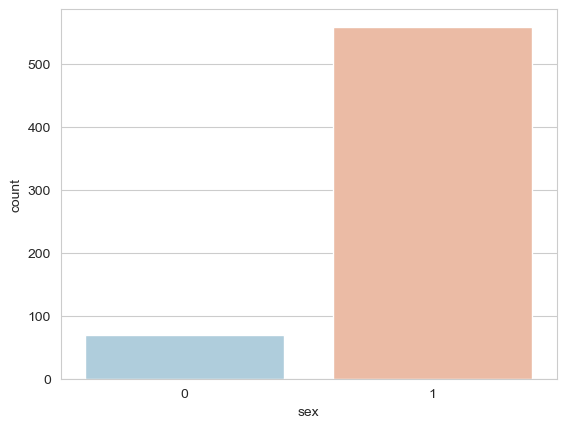

In [173]:
sns.set_style("whitegrid")
sns.countplot(x='sex',data=ndf,palette='RdBu_r')

<Axes: ylabel='Frequency'>

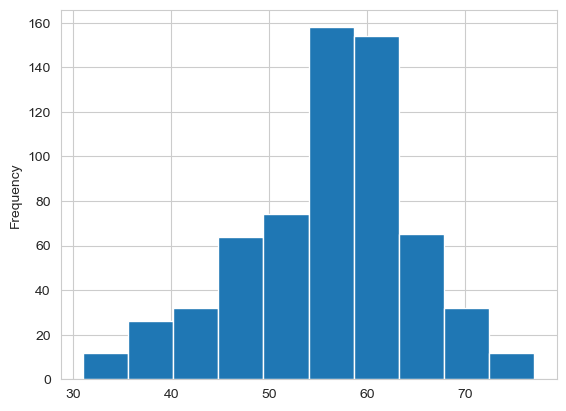

In [175]:
ndf['age'].plot.hist()

<Axes: ylabel='Frequency'>

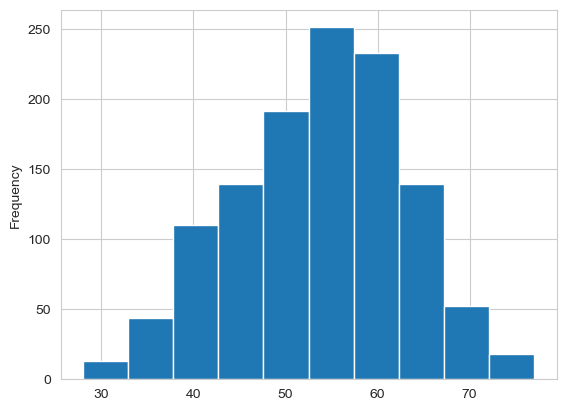

In [176]:
data['age'].plot.hist()

<Axes: ylabel='Frequency'>

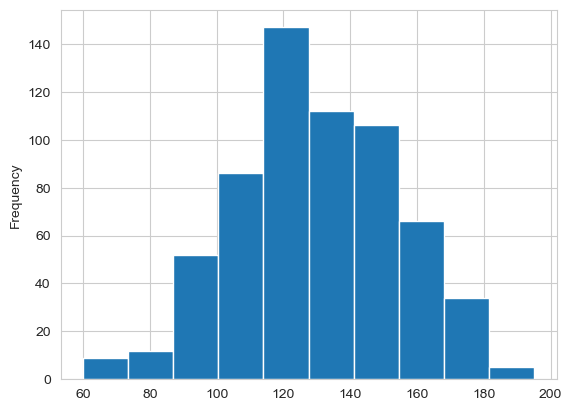

In [177]:
ndf['max heart rate'].plot.hist()

<Axes: ylabel='Frequency'>

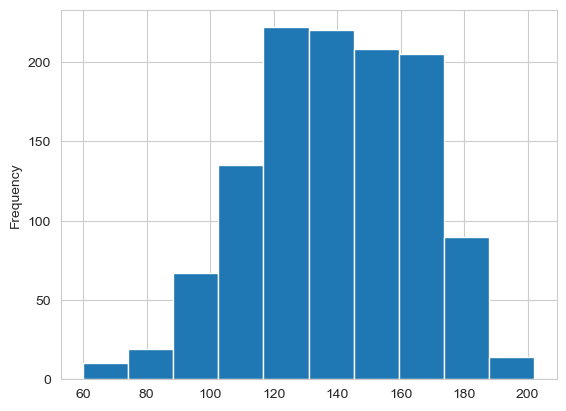

In [178]:
data['max heart rate'].plot.hist()

Train/Test Split

In [77]:
x=data.drop(['target'],axis=1)
y=data['target']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=6)

Supervised Machine Learning Model 1 (Random Forest)

In [79]:
param_grid = {'max_depth':[5,10,None], 'n_estimators':[10,50,100,150,300], 'max_features':[3,5,7,9,11]} 
#Additional parameters taken from https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html

In [80]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid,cv=3,scoring='accuracy')
model_grid = grid.fit(x_train,y_train)

In [81]:
grid.best_params_

{'max_depth': 10, 'max_features': 3, 'n_estimators': 300}

In [82]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=300)

In [83]:
grid_predictions = grid.predict(x_test)

In [84]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       119
           1       0.95      0.94      0.95       119

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

[[113   6]
 [  7 112]]


Supervised Machine Learning Model 2 (SVM)

In [100]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [101]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': ["auto","scale"],'kernel': ['linear','rbf']} 

In [102]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [103]:
model_grid2 = grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.806 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.791 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.868 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.853 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.837 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.858 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.826 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.806 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;

In [104]:
grid.best_params_


{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [105]:
grid_predictions2 = grid.predict(x_test_scaled)

In [106]:
print(classification_report(y_test,grid_predictions2))
print(confusion_matrix(y_test,grid_predictions2))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       119
           1       0.88      0.90      0.89       119

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

[[105  14]
 [ 12 107]]


Unsupervised Machine Learning Algorithm (k-means)

In [130]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [132]:
wcss = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=56)
    kmeans.fit(x_scaled)
    pred=kmeans.predict(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

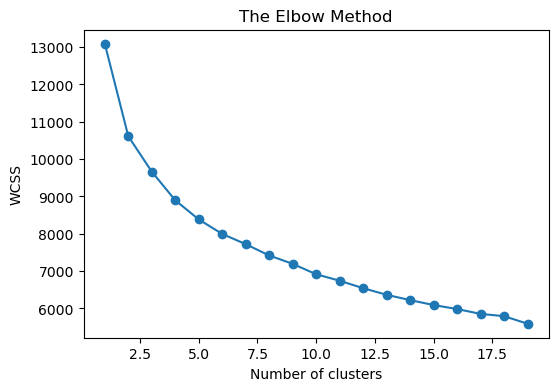

In [133]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [134]:
s_score = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=56)
    kmeans.fit(x_scaled)
    pred=kmeans.predict(x_scaled)
    s_score.append(metrics.silhouette_score(x_scaled, pred))

C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

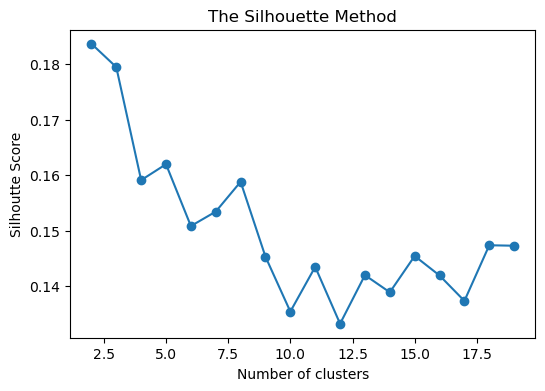

In [135]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 20), s_score, marker='o')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [136]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(x_scaled)
pred = kmeans.predict(x_scaled)

C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\timwe\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [144]:
data['cluster'] = pred

In [145]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
0,40,1,2,140,289,0,0,172,0,0.0,1,0,1
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0,1
3,48,0,4,138,214,0,0,108,1,1.5,2,1,2
4,54,1,3,150,195,0,0,122,0,0.0,1,0,1


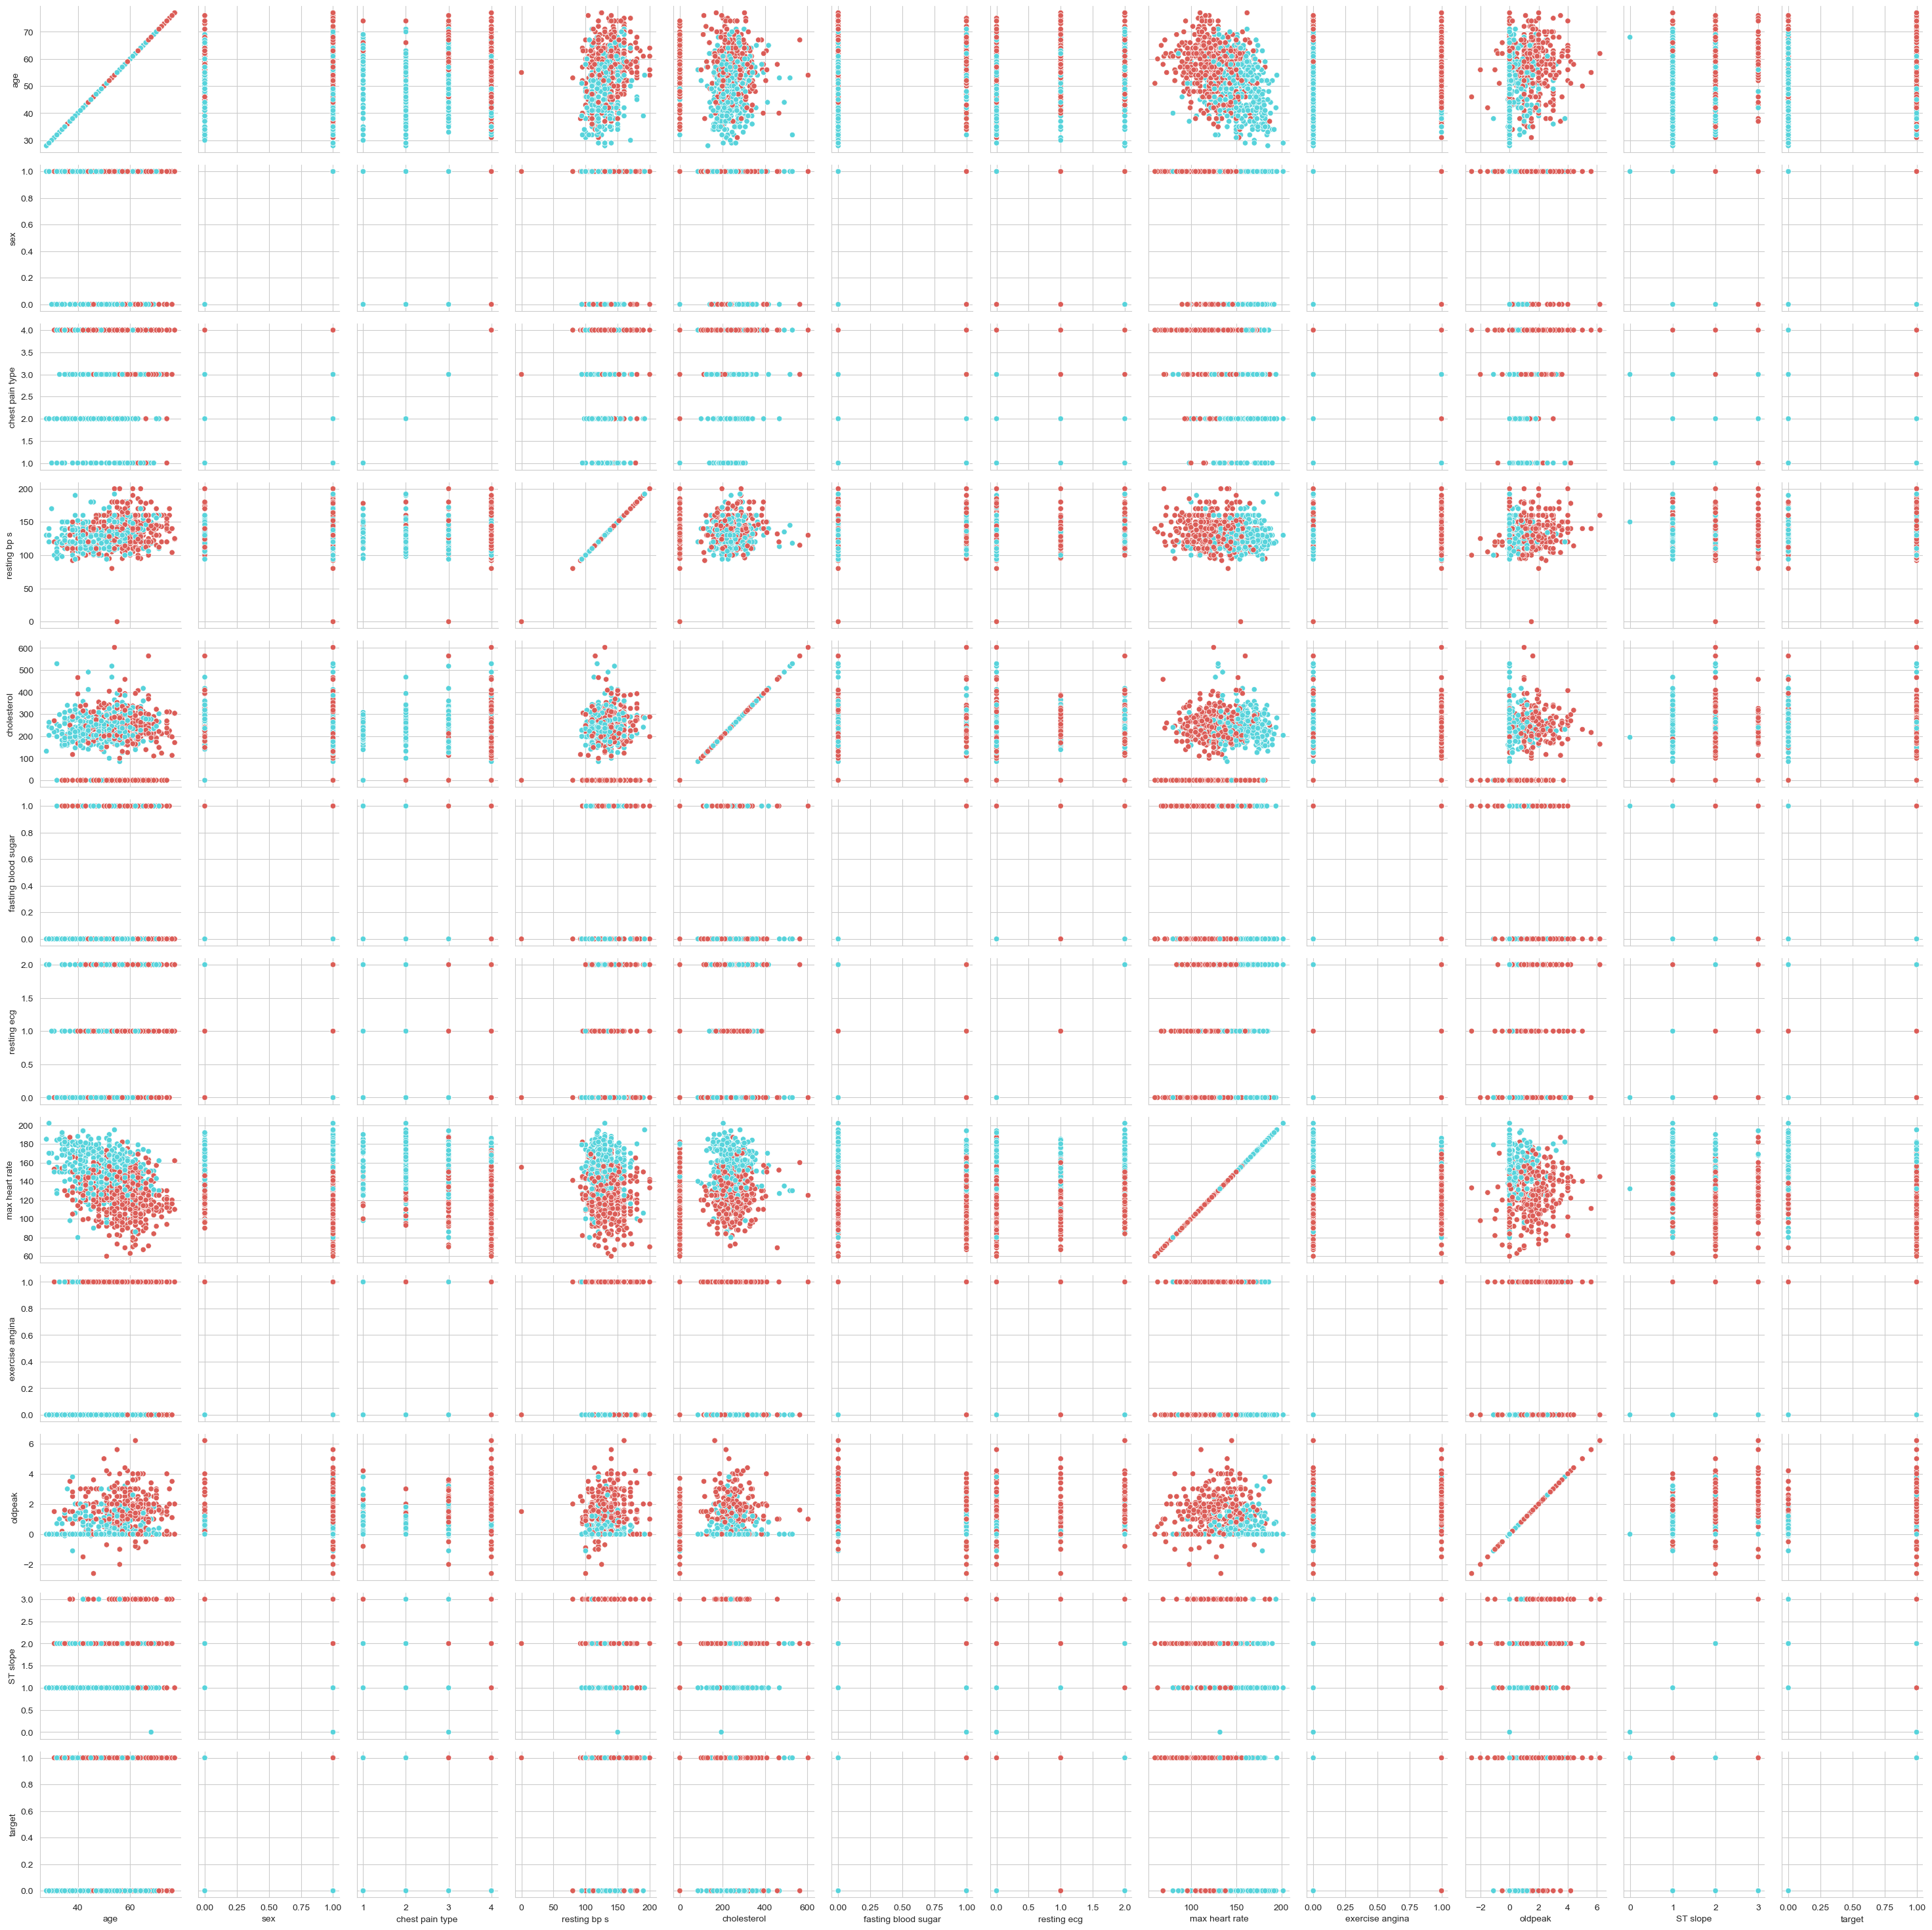

In [150]:
g = sns.PairGrid(data,vars=data.columns[:-1], hue="cluster", palette = "hls")
g = g.map(sns.scatterplot)
plt.show()

In [151]:
data['cluster'].value_counts()

cluster
1    570
2    419
0    201
Name: count, dtype: int64

In [154]:
ndf = data.loc[data['target'] == 1]

In [155]:
ndf['cluster'].value_counts()

cluster
2    341
0    178
1    110
Name: count, dtype: int64

In [156]:
ndf = data.loc[data['target'] == 0]

In [157]:
ndf['cluster'].value_counts()

cluster
1    460
2     78
0     23
Name: count, dtype: int64

In [158]:
ndf = data.loc[data['cluster'] == 0]

In [159]:
ndf.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,57.19403,0.950249,3.696517,129.960199,39.601990,0.611940,0.482587,120.810945,0.492537,0.798507,1.880597,0.885572,0.0
std,8.16867,0.217973,0.618416,21.073880,82.843472,0.488525,0.664037,23.568498,0.501193,0.966565,0.579372,0.319125,0.0
min,34.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,0.0
25%,53.00000,1.000000,4.000000,120.000000,0.000000,0.000000,0.000000,106.000000,0.000000,0.000000,2.000000,1.000000,0.0
50%,58.00000,1.000000,4.000000,130.000000,0.000000,1.000000,0.000000,120.000000,0.000000,0.800000,2.000000,1.000000,0.0
75%,62.00000,1.000000,4.000000,140.000000,0.000000,1.000000,1.000000,135.000000,1.000000,1.500000,2.000000,1.000000,0.0
max,75.00000,1.000000,4.000000,200.000000,276.000000,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,1.000000,0.0


In [160]:
ndf = data.loc[data['cluster'] == 1]

In [161]:
ndf.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.0
mean,49.778947,0.666667,2.724561,129.287719,237.445614,0.110526,0.601754,154.985965,0.063158,0.359123,1.224561,0.192982,1.0
std,8.881187,0.471819,0.940923,16.132950,60.393304,0.313820,0.867899,20.251750,0.243460,0.649019,0.442187,0.394986,0.0
min,28.000000,0.000000,1.000000,94.000000,0.000000,0.000000,0.000000,80.000000,0.000000,-1.100000,0.000000,0.000000,1.0
25%,43.000000,0.000000,2.000000,120.000000,204.000000,0.000000,0.000000,141.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,50.000000,1.000000,3.000000,130.000000,234.000000,0.000000,0.000000,158.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,56.000000,1.000000,3.750000,140.000000,271.000000,0.000000,2.000000,170.000000,0.000000,0.500000,1.000000,0.000000,1.0
max,71.000000,1.000000,4.000000,192.000000,529.000000,1.000000,2.000000,202.000000,1.000000,3.800000,3.000000,1.000000,1.0


In [162]:
ndf = data.loc[data['cluster'] == 2]

In [163]:
ndf.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0
mean,57.415274,0.806683,3.701671,137.105012,255.439141,0.162291,0.933174,128.059666,0.778043,1.749165,2.045346,0.813842,2.0
std,8.315222,0.395372,0.652028,18.838738,62.862179,0.369158,0.909978,20.052652,0.416059,1.100573,0.453952,0.389699,0.0
min,31.000000,0.000000,1.000000,92.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,1.000000,0.000000,2.0
25%,53.000000,1.000000,4.000000,124.500000,217.500000,0.000000,0.000000,114.000000,1.000000,1.000000,2.000000,1.000000,2.0
50%,58.000000,1.000000,4.000000,138.000000,249.000000,0.000000,1.000000,127.000000,1.000000,1.600000,2.000000,1.000000,2.0
75%,63.000000,1.000000,4.000000,148.000000,288.000000,0.000000,2.000000,144.000000,1.000000,2.400000,2.000000,1.000000,2.0
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,187.000000,1.000000,6.200000,3.000000,1.000000,2.0
